**1. The dataset 'ice' contains data on the ice coverage of Lake Michigan for each year from 1973-2018. Specifically, the dataset contains te year's maximum ice coverage of Lake Michigan as a percentage for each year**

*(a) Plot a histrogram for these data, choosing the number of bins subjectively. Based on the result, does the distribution of ice coverages appear to be symmetric?*

Based on the histogram it appears that the distribution of ice is not symmetric and has a positive skew. 

*(b) One statistic used to evaluate symmetry of a random variable X is the standardized skewness given by*

$\frac{E((X-\mu^3)}{\sigma^3}$

*where $\mu=\sum{(X)}$ and $\sigma^2=Var(X)$. Note that, if the distribution of X is symmetric about $\mu$ then the standardized skewness of X is 0. The sample standardized skewness for a set of data $Y_1, Y_2,....,Y_n$ is given by*

$\frac{\sum{(Y_j-\bar{Y})^3/n}}{S^3}$

*where $\bar{Y}$ and $S^2$ are the sample mean and sample variance, respectively of the data. Calculate the sample standardized skewness for the ice coverage data.*

Calculating the sample standardized skewness gives X=1.10 suggesting the distribution of the percentage of ice is not symmetric about $\mu$

*(c) Using the bootstrap method, calculate the estimates of the bias and standard error the sample standardized skewness calculated in part (a). Use the random seed 3520506 and 100,000 bootstrap replications. Be sure to give the details on the inputs to the function boot that you used.*

bias=-.008

std error =.27

*(d) Based on these results, is there evidence that the distribution of the ice coverage data is not symmetric about its mean? Why or why not?*

A 95% CI for standardized skewness is 

$0\pm1.96(.27)=(.56,1.63)$

Because this interval is positive and the CI bounds do not cross zero would suggest that the distribution of ice is not symmetric. 

*(e) Transform the data by taking the (natural) log of the coverage values. Repeat parts (a)-(d) for the transformed data.*

Taking the log produced a more uniform looking histogram. I used a much lower bin of 10 as any higher did not provide a substantial difference in the plot. Calculating skewness provides a X=.23. Suggesting transforming the data by taking the log makes the data follow a normal distribution if we assume x=0 equates to normality.

bias=.003
std error=.21

A 95% CI for standardized skewness here is

$.23\pm1.96(.21)=(-.17, .63)$

Because the value passes through 0 suggests log transformed data follows a normal distribution

[1] 1.104433


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = ice$pct, statistic = skew, R = 1e+05)


Bootstrap Statistics :
    original       bias    std. error
t1* 1.104433 -0.008034613   0.2729759

[1] 1.635033

[1] 0.5649672

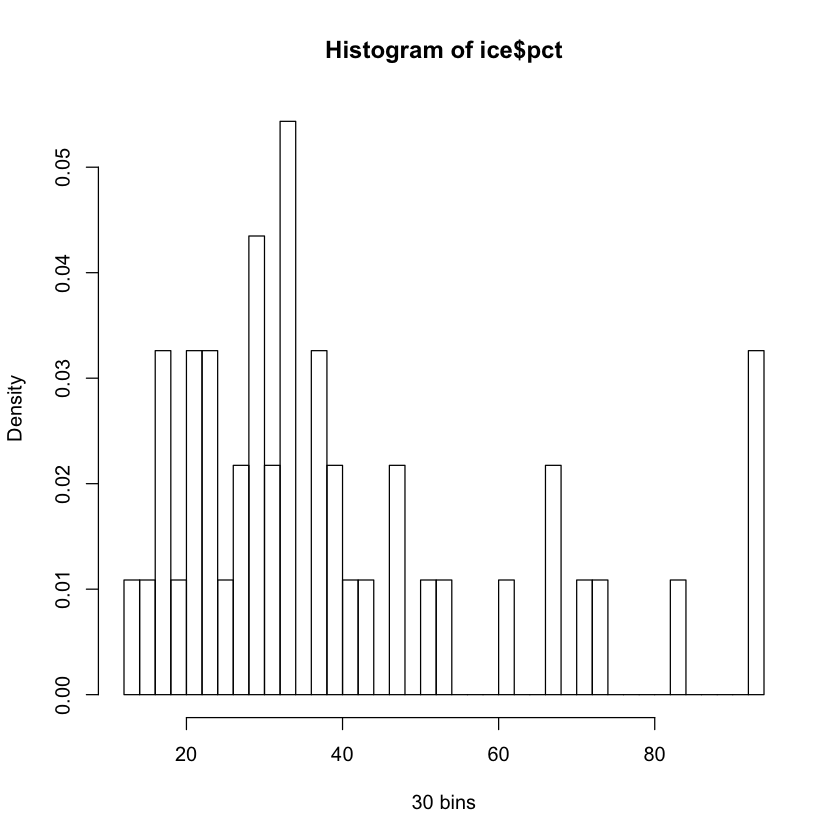

[1] 0.2341031


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = ln_pct, statistic = skew, R = 1e+05)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.2341031 0.003972511   0.2061028

[1] 0.6339615

[1] -0.1739615

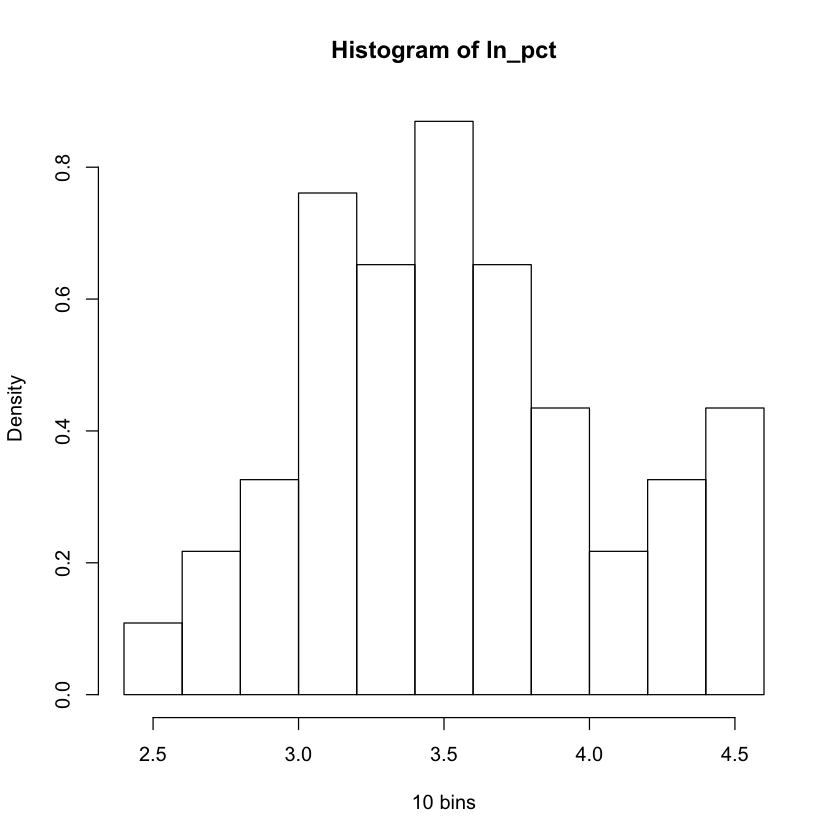

In [11]:
#part a
data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/ice.csv'
#data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/ice.csv'
ice<-read.csv(data_loc, header=FALSE)
colnames(ice) <- c("pct")
hist(ice$pct,breaks=30,freq=F, xlab='30 bins')

#part b
#Get n
n <- dim(ice)[1]  
skew=function(x, ind){(sum((((x[ind])-mean(x[ind]))^3)/n))/sd(x[ind])^3}


skew(ice$pct)

#part c
library("boot")
set.seed(520506)
boot(ice$pct, skew, 100000)

CI=1.96*.2729759
1.10+CI
1.10-CI

#part d
ln_pct=log(ice$pct)
hist(ln_pct,breaks=10,freq=F, xlab='10 bins')
skew(ln_pct)
boot(ln_pct, skew, 100000)

ln_CI=1.96*.2061028

.23+ln_CI
.23-ln_CI

**2. Consider the data on forearm lengths given in the dataset 'forearm'. The purpose of this exericse is to consider the hypothesis that forearm lengths as represented in this dataset are (approximately) normally distributed**

*(a) Plot the kernel density estimate for these data using the value of h based on the Sheather-jones method. Include a dashed line on the plot representing a normal density with the mean and standard deviation taken to be the sample values for the forearm data. Based on this plot, do the data appear to be approximately normally distributed?*

Based on the plot it appears the data is normally distributed as it followed the normal density plot fairly well.

*(b) Using the function fan.test in the package GoFKernel compute a p-value for a test that the distribution of forearm length is normal and give the conclusion of the test. Take lower and upper to be the minimum minus 1 and maximum plus 1 respectively*

Using the fan.test we get a p-value of .99 the large p-value indicates that the data are  consistent with the hypothesis that the data follows a normal distribution. Therefore we conclude that the data seems reasonable. 


	Fan's test

data:  arm$x
Ig = -3.3481, p-value = 0.9996


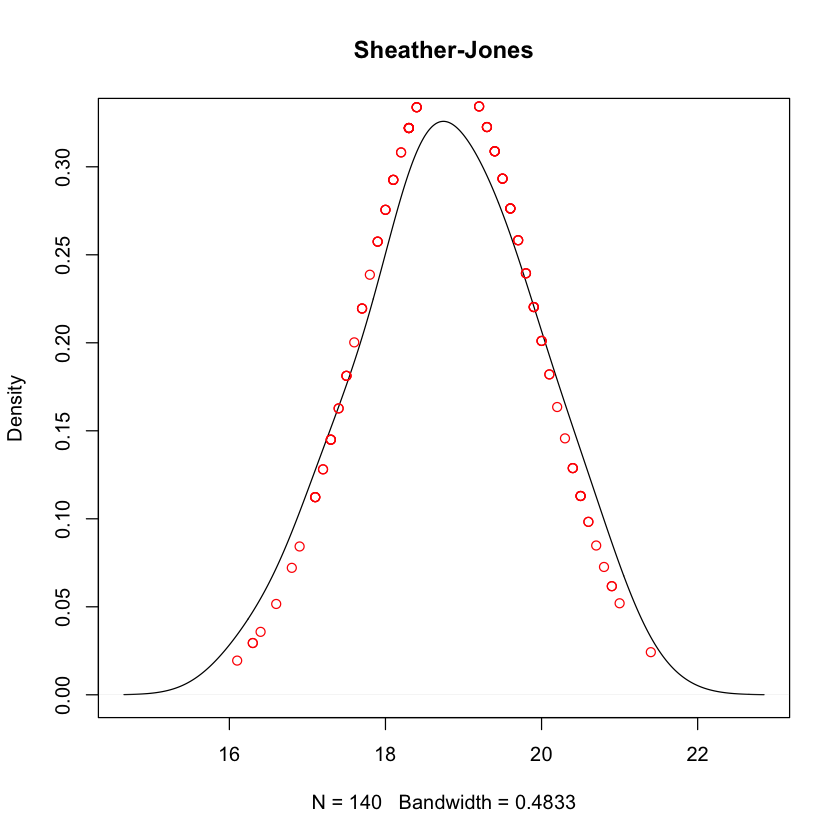

In [59]:
#forearm length in inches
library('GoFKernel')
data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/forearm.csv'
#data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/forearm.csv'
#part a
arm<-read.csv(data_loc)
mu=mean(arm$x)
std=sd(arm$x)
Fy=dnorm(arm$x, mu, std)
plot(density(arm$x, bw="SJ"), main='Sheather-Jones')
#normal distribution
points(arm$x, Fy, col=2)

#part b
lwr=min(arm$x)
upr=max(arm$x)

fan.test(arm$x, fun.den=dnorm, par=list(mean=mu, sd=std), lower=15, upper=22)

**3. The dataset 'peabody' contains the variable peabody, the subjects score on the peabody vocab test. The dataset also includes two other variables, urban, an indicator variable with 1 indicating that the child is from an urban area and 0 indicating that the child is from a rural area and disadv, an indicator variable with 1 indicating that the child is considered “disadvantaged” and 0 indicating that the child is “advantaged”**

*(a) Plot the density estimates of the peabody scores, analyzing disadvantaged and advantages children separately. For each group, use the Sheather-Jones value of the smoothing parameter. Based on these results, does it appear that the distribution of the peabody scores is different for disadvantaged and advantaged children? > peabody.d<-subset(peabody, disadv==1)*

Based on the plots its hard to discern any major differences in the distribution of scores for disadvantaged and advantaged children

*(b) Compute the p-value for the test of the hypothesis that the density function of peabody is the same for the two groups defined by the type of disadv. Choose the smoothing parameters using the Sheather-Jones method; use nboot=10000 and take the random seed to be 3520506.*

p=.09

*(c) Based on the result in part (a) what do you conclude regarding the hypothesis? If there is evidence that the two densities are not the same, briefly sumarize how they are different*

Based on the plots and testing the hypothesis that there are no differences in the shapes of distributions for children who are disadvanted vs advantaged. We would rejeect the hypothesis that there is no difference in the shapes of the distribution thought it is trending towards being different. Perhaps there are other variables that would influence the distribution moreso. 

*(d) Repeat parts (a)-(c) for urban and rural children.*

Based on whether children lived in a rural vs urban environment seems to suggest there is a difference in the shape of the distribution for peabody scores. Looking at the plots the urban children have a significantly lower density estimate compared to the rural. When we compute the p-value we get p=0 suggesting there is very strong evidence that the distribution of peabody scores is different for the rural and urban environments. It would be interesting to see how the disadvantaged and environment play a role in the peabody scores and if the two would significantly impact the distributions. 

Package 'sm', version 2.2-5.6: type help(sm) for summary information


Attaching package: ‘sm’


The following object is masked from ‘package:boot’:

    dogs




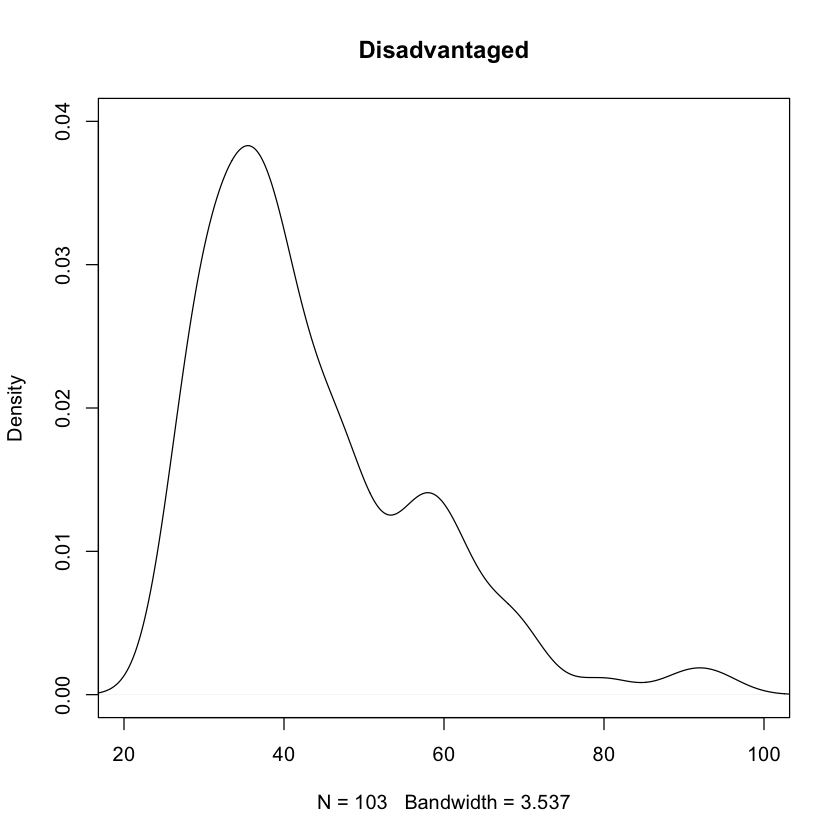


Test of equal densities:  p-value =  0.095 


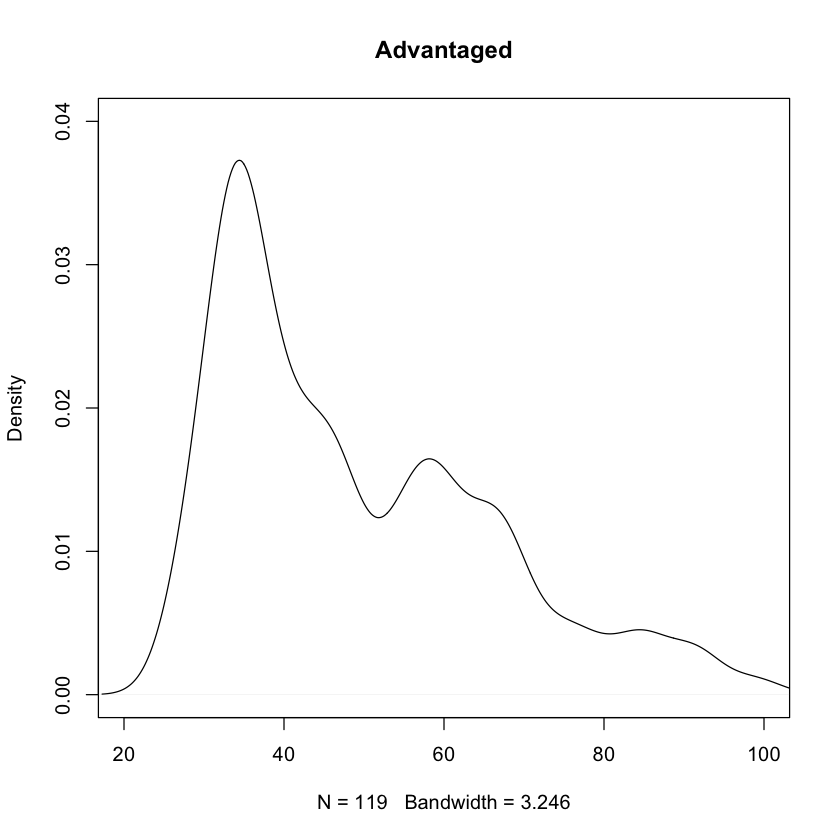

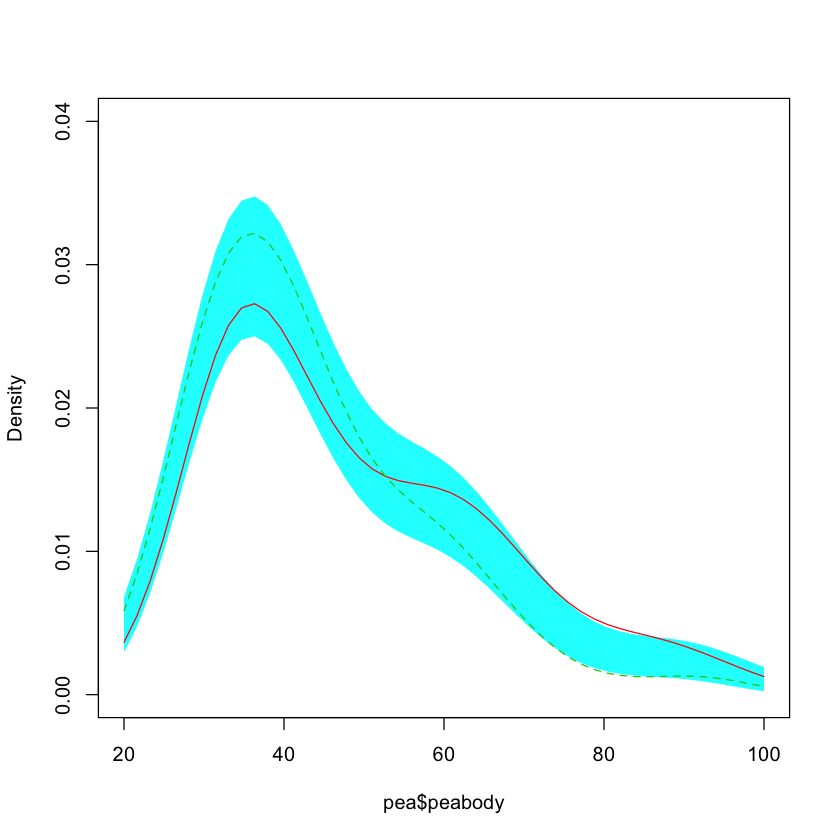

In [12]:
library("boot")
library("sm")
data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/peabody.csv'
#data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/peabody.csv'
pea<-read.csv(data_loc)
pea.dis=subset(pea, disadv==1)
pea.adv=subset(pea, disadv==0)
#part a
plot(density(pea.dis$peabody, bw="SJ"), main='Disadvantaged', xlim=c(20,100), ylim=c(0,.04))
plot(density(pea.adv$peabody, bw="SJ"), main='Advantaged',xlim=c(20,100), ylim=c(0,.04))
#part b
set.seed(3520506)
dis=bw.SJ(pea$peabody[pea$disadv==1])
adv=bw.SJ(pea$peabody[pea$disadv==0])
h=2*(1/adv+1/dis)^-1

sm.density.compare(pea$peabody, group=pea$disadv, model="equal", bw=h, nboot=10000, xlim=c(20,100), ylim=c(0,.04))

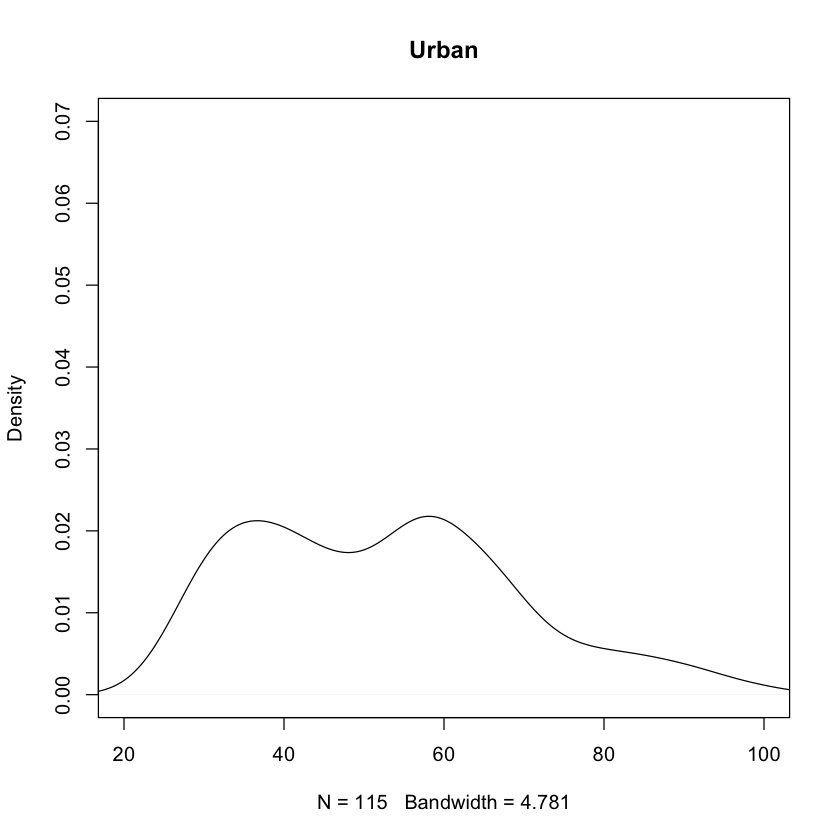


Test of equal densities:  p-value =  0 


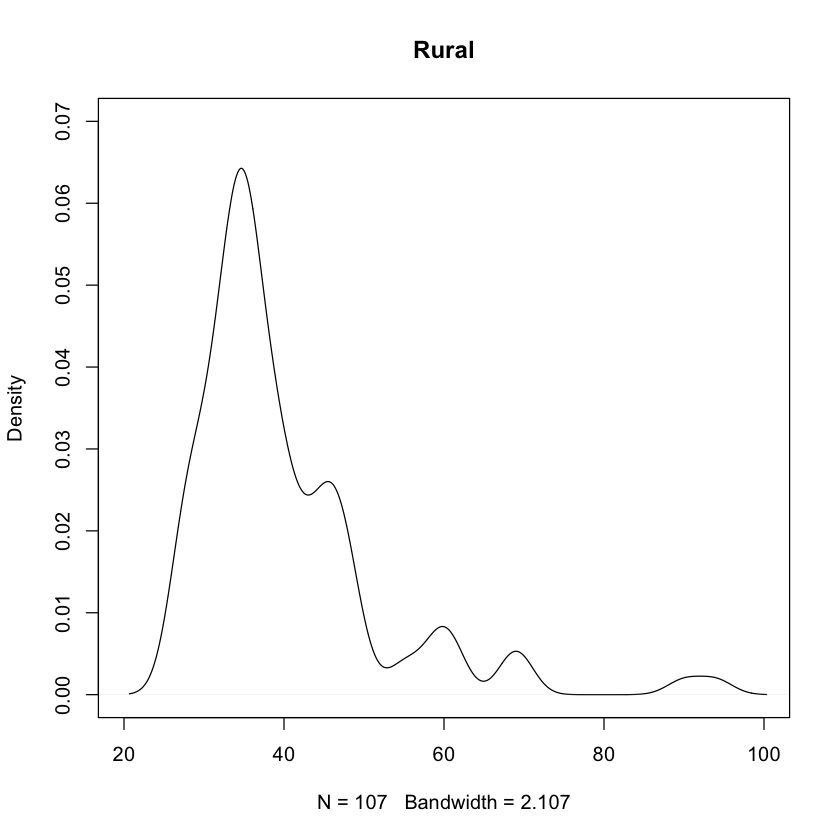

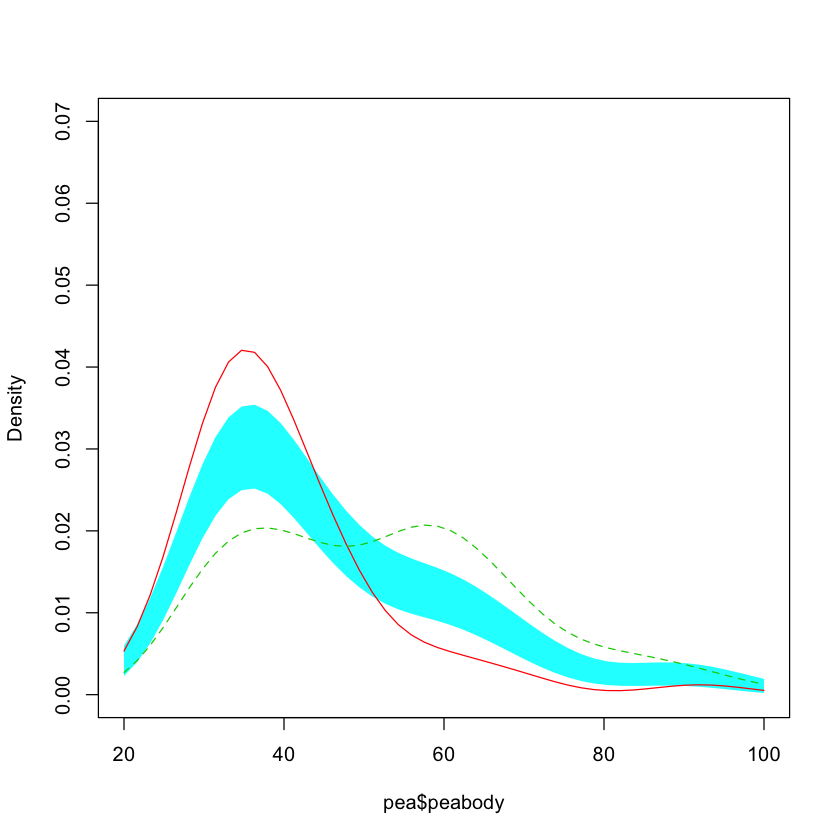

In [14]:
#part d
pea.urb=subset(pea, urban==1)
pea.rur=subset(pea, urban==0)

#part a
plot(density(pea.urb$peabody, bw="SJ"), main='Urban', xlim=c(20,100), ylim=c(0,.07))
plot(density(pea.rur$peabody, bw="SJ"), main='Rural',xlim=c(20,100), ylim=c(0,.07))
#part b
set.seed(3520506)
urb=bw.SJ(pea$peabody[pea$urban==1])
rur=bw.SJ(pea$peabody[pea$urban==0])
h_urban=2*(1/rur+1/urb)^-1

sm.density.compare(pea$peabody, group=pea$urban, model="equal", bw=h_urban, nboot=10000, xlim=c(20,100), ylim=c(0,.07))